## TO-DO:
- research on data pre-processing steps, feature engineering, ...
- research on models written down below

## Theoretical stuff / useful insights

- https://wandb.ai/iamleonie/A-Gentle-Introduction-to-Time-Series-Analysis-Forecasting/reports/A-Gentle-Introduction-to-Time-Series-Analysis-Forecasting--VmlldzoyNjkxOTMz
  - time series analysis: gain patterns and recurring structures to decide which model to use
  - we need to come up w/ a multivariate time series forecasting because of predicting many energy resources
  - prediction time frame: rather short term (1 week) with respect to our time frame of the historical data set (i.e. months/years)
  - Time series analysis concepts/methods:
    - Components of time series having an impact on what TS model to choose:
      - level
      - trend
      - seasonality -> at fixed points
      - cycle -> not at fixed points
      - noise
    - stationarity (=TS is stationary when mean, variance, covariance, ... are independent of time)
      - Little conceptualized image: https://api.wandb.ai/files/iamleonie/images/projects/36935173/d6c7acfd.png
      - differencing non-stationary values in order to let the model easier predict new values

- https://www.sciencedirect.com/topics/economics-econometrics-and-finance/forecasting-model
  - Historical Moving Average (HMA)
  - Exponential Weighted Moving Average (EWMA)
  - Autoregressive Models (ARCH and GARCH)
  - HMA-VIX Adjustment

- https://medium.com/analytics-vidhya/introduction-to-time-series-analysis-and-key-concepts-dbf6c394984f
  - models to be researched:
    - AR models
    - MA models
    - ARMA models
    - ARMAX models
    - ARIMA models



## Chat-GPT Queries

<details>

<summary>In our project we got the task to predict the energy generation mix of germany for the next 7 days. Since we only got quarter-hourly data values of all currently used energy resources of germany's energy platform SMARD, we need to think about a time series forecasting model that delivers good predictions regarding the lower amount of data we've gathered.
As a result of that could you recommend some models performing well under the assumption of lower amount of data and also models dealing with multivariate data sets because we have to predict the whole energy generation mix consisting of multiple energy resources.
</summary>

Predicting the energy generation mix for the next 7 days in Germany using quarter-hourly data from the SMARD platform is a challenging time series forecasting task. You're right to consider models that work well with limited data and can handle multivariate time series data effectively. Here are some models and techniques to consider:

  - ARIMA (AutoRegressive Integrated Moving Average): ARIMA models are a classic choice for time series forecasting. They work well when there is a clear trend and seasonality in the data. You can fit a separate ARIMA model to each energy resource's time series data, and then combine the predictions for the generation mix.

  - VAR (Vector Autoregression): VAR models are designed for multivariate time series data. They capture the dependencies between different energy resources. You can fit a VAR model to the data and use it to forecast the generation mix.

  - Prophet: Developed by Facebook, Prophet is a forecasting model designed for time series data with daily observations. It can capture seasonality and holidays effectively. You would need to preprocess your data to aggregate it to a daily level before using Prophet.

  - LSTM (Long Short-Term Memory): LSTM is a type of recurrent neural network (RNN) that is well-suited for sequence data. It can capture long-term dependencies in the data, making it a good choice for time series forecasting. You can train a separate LSTM model for each energy resource and combine the predictions.

  - Seq2Seq (Sequence-to-Sequence): Seq2Seq models, which use recurrent neural networks (RNNs) or transformers, are suitable for sequence prediction tasks. They are particularly effective for multivariate time series forecasting.

  - XGBoost and LightGBM: These gradient boosting algorithms can be used for time series forecasting. You'll need to engineer appropriate features from your data to use them effectively.

  - Hybrid Models: You can also create hybrid models that combine the strengths of different algorithms. For example, you can use a combination of ARIMA and LSTM or VAR and XGBoost to capture both short-term and long-term patterns in the data.

  - Ensemble Models: Create an ensemble of different models, such as combining predictions from ARIMA, LSTM, and XGBoost. Ensemble models often perform better than individual models.

When working with a limited amount of data, it's essential to perform data preprocessing, feature engineering, and hyperparameter tuning carefully. Additionally, consider using rolling or expanding windows for training and validation to evaluate your model's performance as you move through time. Cross-validation can help you assess the model's stability and generalization capabilities.

Furthermore, don't forget to keep an eye on external factors like weather forecasts and holidays, as they can significantly impact energy generation. Integrating these external factors into your model may enhance its predictive accuracy.

Remember that time series forecasting often requires iterative experimentation to find the best model for your specific dataset, so be prepared to test different approaches and fine-tune your models as you work on this project.

</details>

<details>

<summary>
But which of the given models can handle limited datasets best?
</summary>

When working with limited datasets, it's important to choose models that are not overly complex and are less prone to overfitting. The following models are generally well-suited for time series forecasting with limited data:

  - ARIMA (AutoRegressive Integrated Moving Average): ARIMA models are known for their simplicity and ability to handle small datasets. They are particularly effective when there is a clear trend and seasonality in the data.

  - VAR (Vector Autoregression): VAR models can work well with limited data, especially when dealing with multivariate time series. They are flexible and can capture dependencies between different variables without requiring an extensive amount of data.

  - Prophet: Prophet is designed to work with daily observations and is relatively robust to missing data. It can handle limited datasets while still capturing seasonality and holiday effects.

  - Ensemble Models: Building an ensemble of simpler models like ARIMA or VAR can often lead to robust predictions while mitigating the risk of overfitting. By combining the forecasts from multiple models, you can improve accuracy.

  - Exponential Smoothing Models: Models like Holt-Winters exponential smoothing are relatively simple and work well with limited data. They are effective for capturing trend and seasonality.

  - Simple Neural Networks: Basic feedforward neural networks can be used for time series forecasting and can be kept relatively simple. They are more data-hungry than some other methods, but with careful feature engineering and architecture design, they can still work well with limited data.

It's important to note that the effectiveness of a model in handling limited data also depends on the specific characteristics of your dataset. For example, the presence of strong seasonality or trends may favor certain models. Therefore, it's a good practice to experiment with multiple models and assess their performance using appropriate evaluation metrics and cross-validation techniques on your specific dataset.

</details>

## Code examples

In [12]:
# CSV example: https://www.smard.de/home/downloadcenter/download-marktdaten/?downloadAttributes=%7B%22selectedCategory%22:1,%22selectedSubCategory%22:1,%22selectedRegion%22:%22DE%22,%22selectedFileType%22:%22CSV%22,%22from%22:1677452400000,%22to%22:1678057199999%7D
from google.colab import files
uploaded = files.upload()

Saving Realisierte_Erzeugung_202302270000_202303052359_Viertelstunde.csv to Realisierte_Erzeugung_202302270000_202303052359_Viertelstunde.csv


- first try regarding seasonal_decompose of example data
  - seasonal decomposition with respect to following metrics: trend, seasonality, noise/residual

<ipython-input-67-3370f005cf46>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)


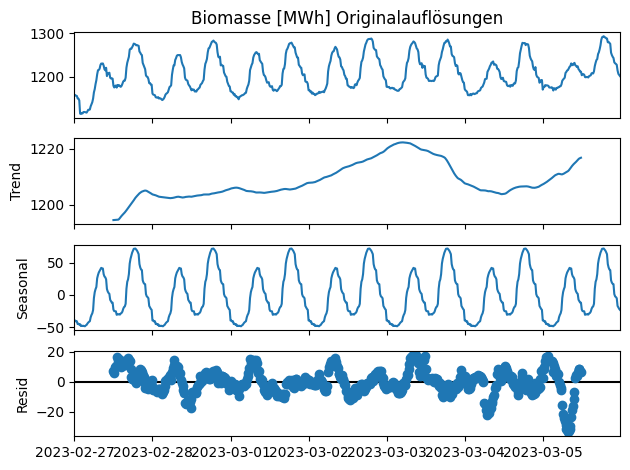

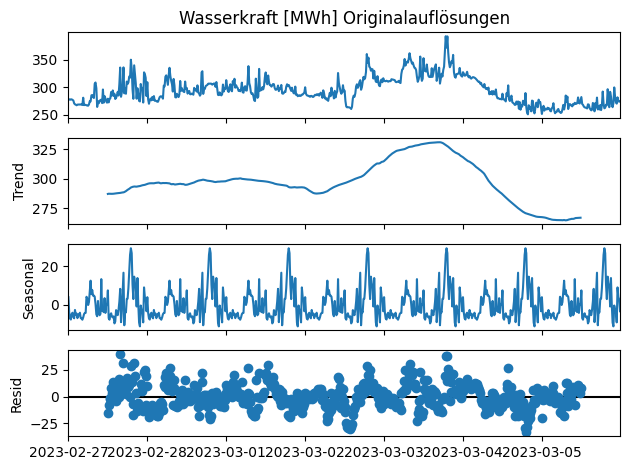

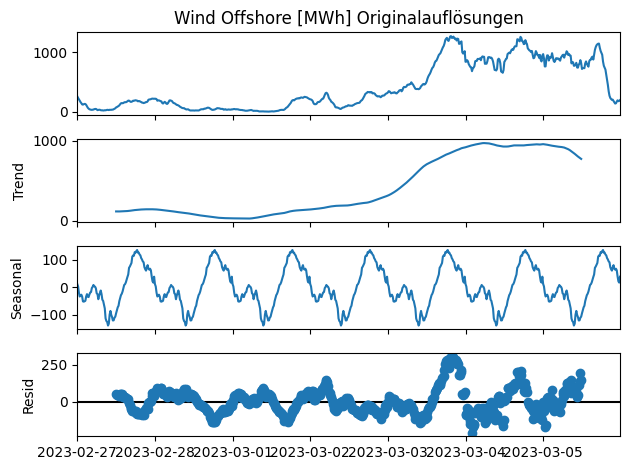

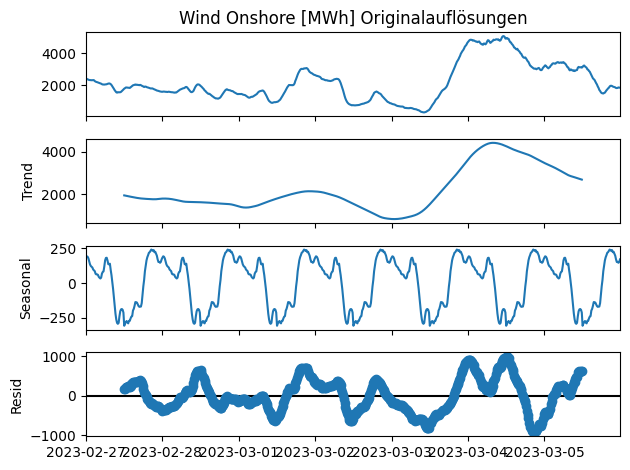

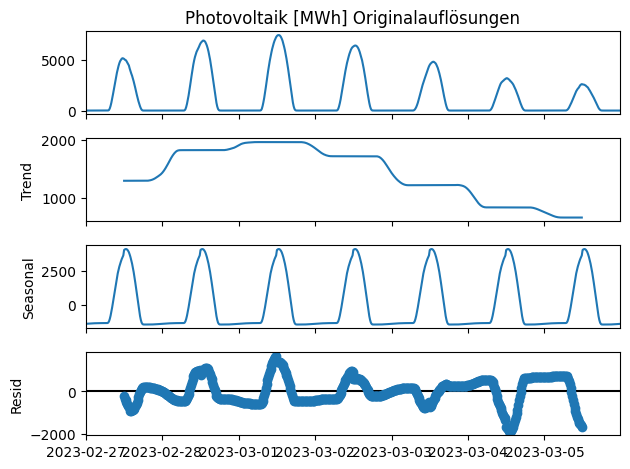

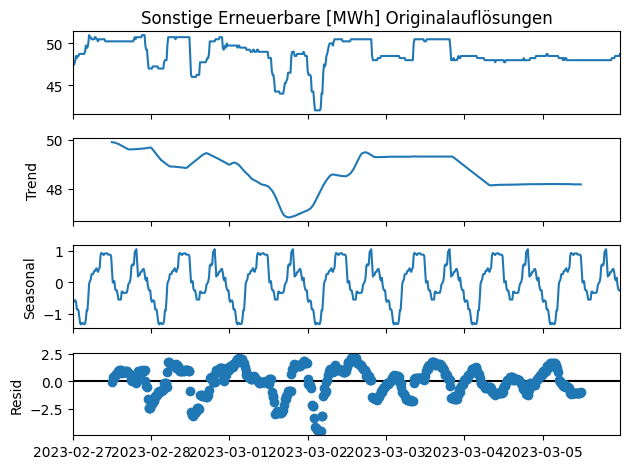

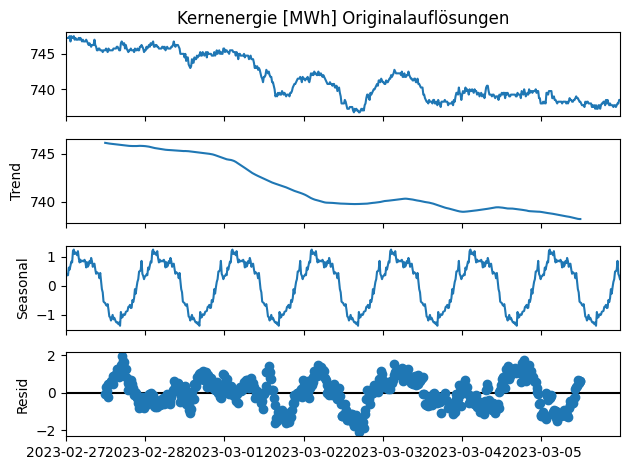

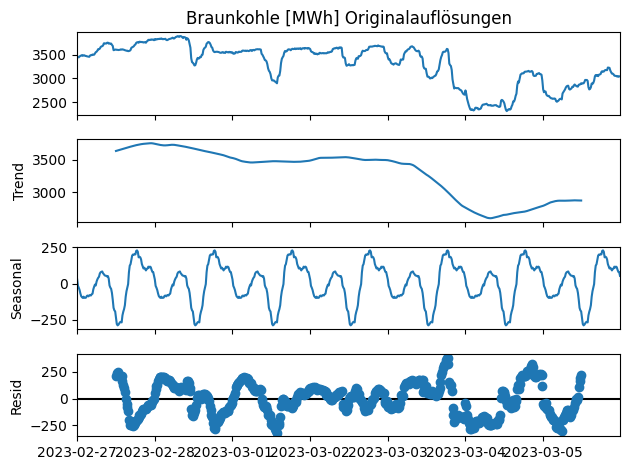

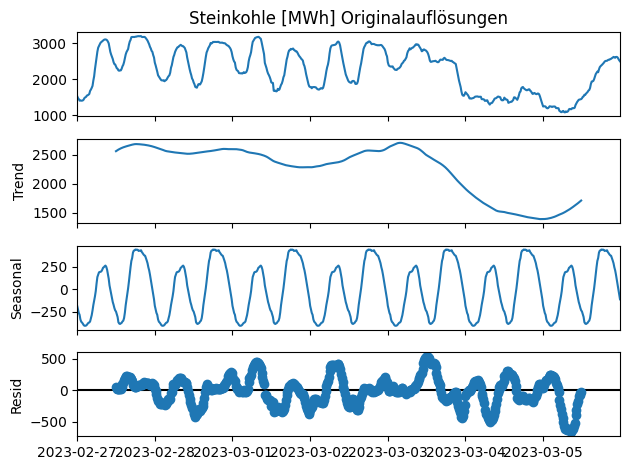

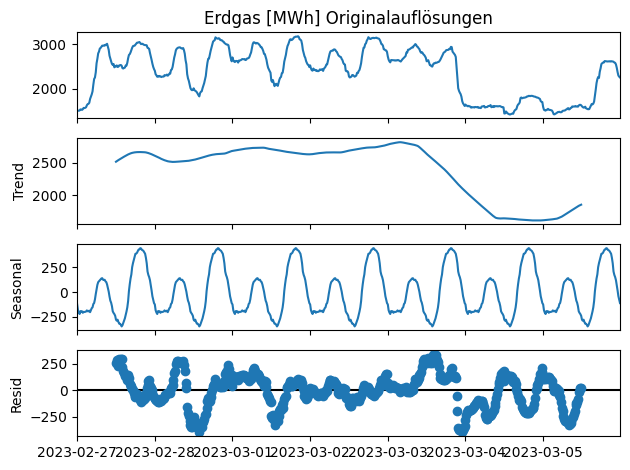

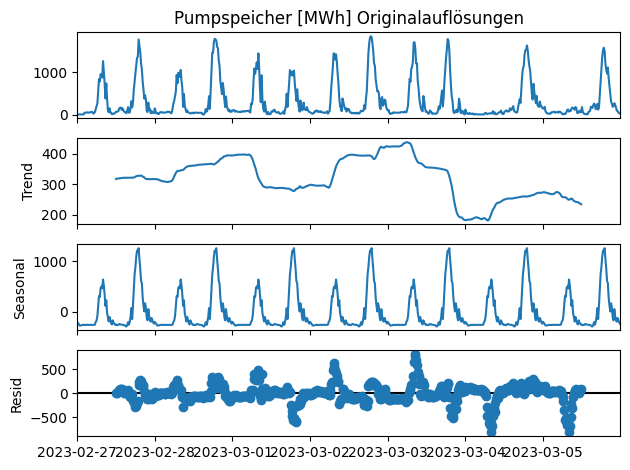

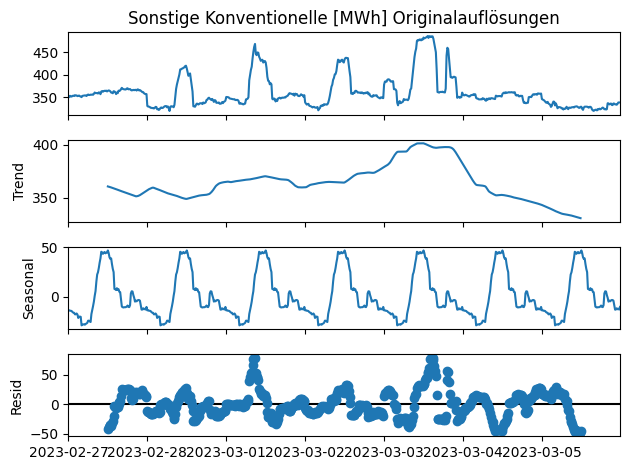

In [67]:
from statsmodels.tools.typing import DataFrame
# https://stackoverflow.com/questions/64295560/how-to-use-statsmodels-tsa-seasonal-seasonal-decompose-with-a-pandas-dataframe
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
# The timestamp has to be set as the index of the dataframe df
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, on_bad_lines='skip', sep=';')
# df['Datum_Anfang'] = pd.to_numeric(pd.to_datetime(df['Datum'] + ' ' + df['Anfang'], format='%d.%m.%Y %H:%M'))
df['Datum_Anfang'] = pd.to_datetime(df['Datum'] + ' ' + df['Anfang'], format='%d.%m.%Y %H:%M')
# df['Datum_Ende'] = pd.to_numeric(pd.to_datetime(df['Datum'] + ' ' + df['Ende'], format='%d.%m.%Y %H:%M'))
df['Datum_Ende'] = pd.to_datetime(df['Datum'] + ' ' + df['Ende'], format='%d.%m.%Y %H:%M')
df = df.drop(['Datum', 'Anfang', 'Ende'], axis=1)
for col in df.columns:
  if col not in ['Datum_Anfang', 'Datum_Ende']:
    df[col] = df[col].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
df.head()

# df.dtypes

df = df.drop(['Datum_Ende'], axis=1)

tdi = pd.DatetimeIndex(df.Datum_Anfang)
df = df.reset_index().set_index(tdi)
df = df.drop(columns=['Datum_Anfang'])
df.head()


def season_decom(df: DataFrame, model='additive'):
  for col in df.columns[1:]:
    # period is 96 because so far we're gathering quarter-hourly data sets
    decomp = seasonal_decompose(df[col], model=model, period=96)
    decomp.plot()
  # return pd.concat([pd.DataFrame({col: seasonal_decompose(df[col], model=model).trend}) for col in df.columns], axis=1)

season_decom(df)









